# Regression Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. In Python, you can easily perform linear regression using libraries like Scikit-learn, SciPy, and NumPy.

Here's an example demonstrating a simple linear regression with one independent variable with both SciPy and sklearn methods.

When to use scipy.stats.linregress vs. sklearn.linear_model.LinearRegression 🤔
* __scipy.stats.linregress__: This is excellent for simple linear regression (one independent variable). It's straightforward and provides immediate access to statistical measures like p-value and standard error, which are crucial for hypothesis testing and understanding the significance of the relationship. It doesn't handle multiple independent variables directly.

* __sklearn.linear_model.LinearRegression__: This is part of Scikit-learn, a machine learning library. It's more versatile and designed for both simple and multiple linear regression. It's preferred when you have multiple features (independent variables), need to incorporate more advanced machine learning workflows (like cross-validation, regularization, pipelines), or want to use other scikit-learn functionalities. It focuses more on prediction and model evaluation metrics rather than direct statistical inference values like p-values.

### Generate Data
Create some synthetic data that roughly follows a linear pattern:</br> 
$$y = 3 x + 4 + noise$$

In [2]:
# 1. Generate Sample Data
# Let's create some synthetic data that roughly follows a linear pattern: y = 2*x + 5 + noise
np.random.seed(42) # for reproducibility
slope = 3
intercept = 4

X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature (x values)
y = intercept + slope * X + np.random.randn(100, 1) # y values with some noise

# X and y are now numpy arrays.
# X is a 2D array (100 rows, 1 column) representing the feature.
# y is a 2D array (100 rows, 1 column) representing the target.

# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)


#### Graph the Data

In [3]:
# Optional: Visualize the generated data
'''
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, color='blue', label='Generated Data')
plt.title('Generated Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.grid(True)
plt.legend()
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nplt.scatter(X, y, alpha=0.7, color='blue', label='Generated Data')\nplt.title('Generated Synthetic Data for Linear Regression')\nplt.xlabel('X (Feature)')\nplt.ylabel('y (Target)')\nplt.grid(True)\nplt.legend()\nplt.show()\n"

### Linear Regression via SciPy

#### The linregress function returns several values:
-   slope: The slope of the regression line.</br>
-   intercept: The y-intercept of the regression line.</br>
-   r_value: The Pearson correlation coefficient.</br>
-   p_value: The p-value for a hypothesis test whose null hypothesis is that the slope is zero.</br>
-   stderr: The standard error of the estimated slope.</br>
-   intercept_stderr: The standard error of the intercept


Slope (95%): 2.77 +/- 0.30
Intercept (95%): 4.22 +/- 0.34
R-value (Correlation Coefficient): 0.88
P-value: 0.000
Standard Error of slope: 0.15
Standard Error of intercept: 0.17
R-squared: 0.77


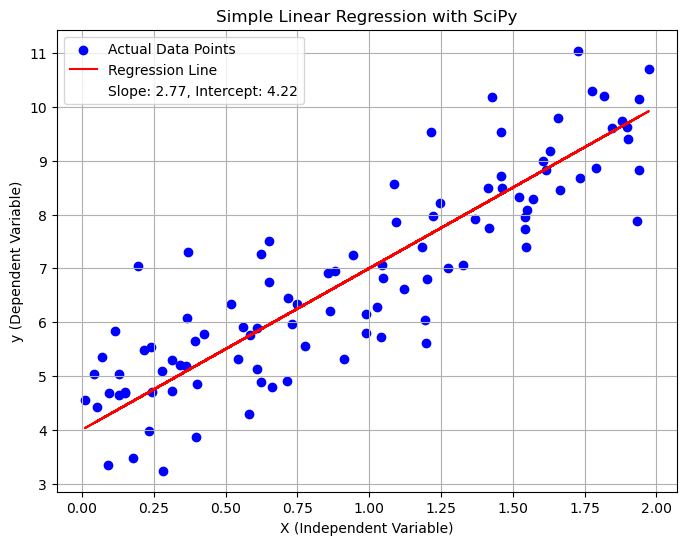

In [4]:
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(X)-2)

results = stats.linregress(X.reshape(-1,), y.reshape(-1,))

print(f"Slope (95%): {results.slope:.2f} +/- {ts*results.stderr:.2f}")
print(f"Intercept (95%): {results.intercept:.2f} +/- {ts*results.intercept_stderr:.2f}")
print(f"R-value (Correlation Coefficient): {results.rvalue:.2f}")
print(f"P-value: {results.pvalue:.3f}")
print(f"Standard Error of slope: {results.stderr:.2f}")
print(f"Standard Error of intercept: {results.intercept_stderr:.2f}")

# You can also get the R-squared value from the r_value
print(f"R-squared: {results.rvalue**2:.2f}")

# Make Predictions with the slope and intercept
# The regression line can be expressed as: y = slope * X + intercept
predicted_y = slope * X + intercept


# 5. Visualize the Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data Points')
plt.plot(X, predicted_y, color='red', label='Regression Line')
plt.plot([],[], ' ', label=f'Slope: {results.slope:.2f}, Intercept: {results.intercept:.2f}', color='red')
plt.title(f'Simple Linear Regression with SciPy')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

### Linear Ordinary Least Squares Regression with Scikit-learn (sklearn)
LinearRegression fits a linear model with p coefficients, $w = (w_1, w_2 , ..., w_p)$
 to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
 $$ \min_w ||X w - y ||^2_2 $$
 with $X$ independent variables and $y$ dependent variables. The least squares solution is computed using the singular value decomposition of $X$. If $X$ is a matrix of shape $(n_{samples}, n_{features})$ this method has a cost of $O(n_{samples} n^2_{features})$, assuming that $n_{samples} \ge n_{features}$
.



 
#### Split Data into Training and Testing Sets
It's crucial to split your data to evaluate the model on unseen data.</br>
test_size=0.2 means 20% of the data will be used for testing.</br>
random_state ensures reproducibility of the split.</br>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (80, 1)
Shape of X_test: (20, 1)
Shape of y_train: (80, 1)
Shape of y_test: (20, 1)


#### 3. Model Training
Create the Linear Regression model instance

In [6]:
model = linear_model.LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the model's coefficients and intercept
# The coefficient (slope) represents how much y changes for a one-unit change in X.
# The intercept is the value of y when X is 0.
print(f"\nModel Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


Model Coefficient (Slope): 2.80
Model Intercept: 4.14


#### 4. Prediction
Make predictions on the test data set

In [7]:
y_pred = model.predict(X_test)

# Evaluation
# Evaluate the model's performance using common regression metrics

# Mean Squared Error (MSE): The average of the squared differences between predicted and actual values.
# Lower MSE means better fit.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R-squared (R2 Score): Represents the proportion of variance in the dependent variable
# that can be predicted from the independent variable(s).
# Ranges from 0 to 1, where 1 means perfect prediction.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 0.65
R-squared (R2 Score): 0.81


#### Visualization of the Linear Regression Fit

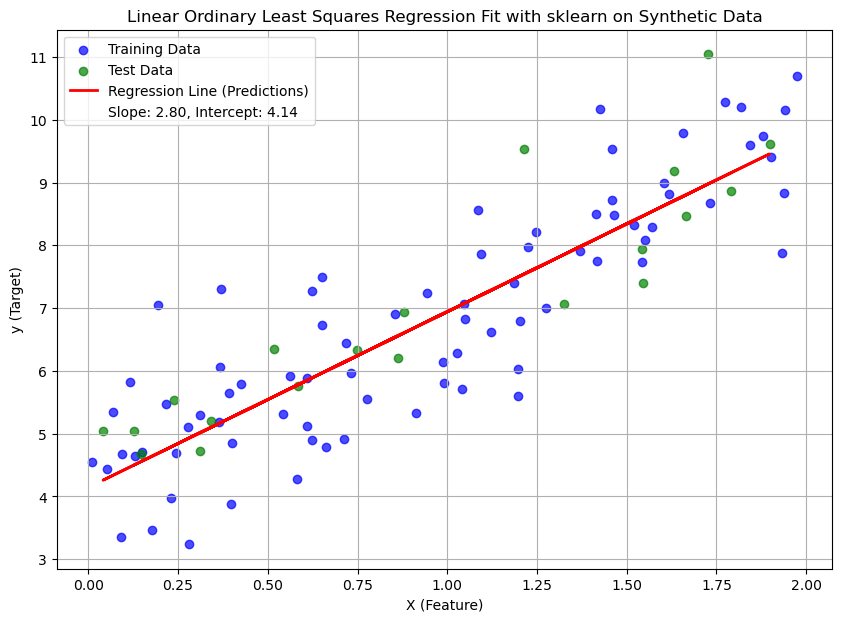


Prediction for X = 1.5: y = 8.34


In [8]:
plt.figure(figsize=(10, 7))

# Plot the original training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Plot the original test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot the regression line using the test data's X values and the model's predictions
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predictions)')
plt.plot([],[], ' ', label=f'Slope: {model.coef_[0][0]:.2f}, Intercept: {model.intercept_[0]:.2f}', color='red')

plt.title('Linear Ordinary Least Squares Regression Fit with sklearn on Synthetic Data')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.legend()
plt.grid(True)
plt.show()

# Example of predicting a new, unseen value
new_X_value = np.array([[1.5]]) # Must be a 2D array for scikit-learn
predicted_new_y = model.predict(new_X_value)
print(f"\nPrediction for X = {new_X_value[0][0]}: y = {predicted_new_y[0][0]:.2f}")

### Multiple Linear Regression
Multiple linear regression extends simple linear regression to include two or more independent variables.

#### Example 1
House cost related to the square foot area and number of bedrooms.

In [9]:
import numpy as np
from sklearn import linear_model
import pandas as pd # Often used for handling multiple independent variables

# Sample Data Generation
# Let's consider a scenario where 'y' (house price) depends on 'X1' (size in sq ft)
# and 'X2' (number of bedrooms).
data = {
    'Size_sqft': [1000, 1200, 1500, 1300, 1100, 1600, 1400, 1700, 1800, 1900],
    'Num_Bedrooms': [2, 3, 3, 2, 2, 4, 3, 4, 4, 5],
    'House_Price_k': [250, 300, 380, 320, 280, 420, 350, 450, 480, 520]
}
df = pd.DataFrame(data)

# Define independent variables (features) and dependent variable (target)
X_multi = df[['Size_sqft', 'Num_Bedrooms']]
y_multi = df['House_Price_k']

# Model Initialization and Training
model_multi = linear_model.LinearRegression()
model_multi.fit(X_multi, y_multi)

# Accessing Model Parameters
# Each coefficient corresponds to its respective independent variable.
print(f"Coefficients (slopes) for Size_sqft and Num_Bedrooms: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_:.2f}")

# Making Predictions
# Predict the price of a house with 1450 sq ft and 3 bedrooms.
new_house = pd.DataFrame([[1450, 3]], columns=['Size_sqft', 'Num_Bedrooms'])
predicted_price = model_multi.predict(new_house)
print(f"Predicted price for a 1450 sqft, 3-bedroom house: ${predicted_price[0]:,.2f}k")


Coefficients (slopes) for Size_sqft and Num_Bedrooms: [ 0.26103448 11.59482759]
Intercept: -40.60
Predicted price for a 1450 sqft, 3-bedroom house: $372.68k


#### Example 2
Sales related to ads on print, radio, and TV media.  

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6]
}
df = pd.DataFrame(data)
print("Sample Data:")
print(df)
# Define independent variables (X) and dependent variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model object
model_skl = LinearRegression()

# Train the model using the training data
model_skl.fit(X_train, y_train)

# Make predictions on the test set
y_pred_skl = model_skl.predict(X_test)

# Evaluate the model's performance
mse_skl = mean_squared_error(y_test, y_pred_skl)
r2_skl = r2_score(y_test, y_pred_skl)

print("\n--- Scikit-learn Results ---")
print(f"Coefficients (β1, β2, β3 for TV, Radio, Newspaper respectively): {model_skl.coef_}")
print(f"Intercept (β0): {model_skl.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse_skl:.2f}")
print(f"R-squared (R²): {r2_skl:.2f}")

# Define independent variables (X) and dependent variable (y)
# For statsmodels, it's good practice to add a constant term for the intercept
X_sm = sm.add_constant(df[['TV', 'Radio', 'Newspaper']])
y_sm = df['Sales']

# Create and fit the OLS (Ordinary Least Squares) model
model_sm = sm.OLS(y_sm, X_sm).fit()

# Print the comprehensive summary of the regression results
print("\n--- Statsmodels Results ---")
print(model_sm.summary())

Sample Data:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6

--- Scikit-learn Results ---
Coefficients (β1, β2, β3 for TV, Radio, Newspaper respectively): [ 0.07468737  0.3029154  -0.06925603]
Intercept (β0): -1.55
Mean Squared Error (MSE): 13.20
R-squared (R²): -0.68

--- Statsmodels Results ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     20.07
Date:                Fri, 18 Jul 2025   Prob (F-statistic):

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Interpretation of scikit-learn Results:

* Coefficients: These values indicate the change in 'Sales' for a one-unit increase in the respective advertising medium, holding other variables constant. For example, model_skl.coef_[0] is the coefficient for 'TV'.

* Intercept: This is the predicted 'Sales' when all independent variables ('TV', 'Radio', 'Newspaper') are zero.

* Mean Squared Error (MSE): This measures the average of the squares of the errors or deviations. A lower MSE indicates a better fit.

* R-squared (R²): This represents the proportion of the variance in the dependent variable ('Sales') that is predictable from the independent variables. An R² of 1 indicates a perfect fit, while 0 indicates no linear relationship.

#### Interpretation of statsmodels Results:

The statsmodels summary is rich with information:

* Coefficients (coef): Same as in scikit-learn, these are the estimated 
beta values.

* std err (Standard Error): Measures the precision of the coefficient estimates. Smaller standard errors indicate more precise estimates.

* t and P>|t| (t-value and P-value):

    * The t-value is the coefficient divided by its standard error.

    * The P-value (P>|t|) indicates the probability of observing such a t-value if the true coefficient were zero (i.e., no relationship). A common threshold for statistical significance is P-value < 0.05. If the P-value is less than 0.05, we typically consider the independent variable to be a statistically significant predictor of the dependent variable.

* [0.025, 0.975] (Confidence Interval): Provides a range within which the true coefficient is likely to fall with 95% confidence.

* R-squared and Adj. R-squared: Similar to scikit-learn, they tell us how much variance in 'Sales' is explained by the independent variables. Adjusted R-squared is generally preferred when comparing models with different numbers of independent variables, as it accounts for the number of predictors.

* F-statistic and Prob (F-statistic): These assess the overall statistical significance of the entire regression model. A low Prob (F-statistic) (e.g., < 0.05) suggests that at least one of the independent variables significantly predicts the dependent variable.

Both scikit-learn and statsmodels are valuable tools for multiple linear regression in Python, serving different primary purposes: scikit-learn for predictive modeling and statsmodels for statistical inference and hypothesis testing.